# Relatorio - 1
#### _Nome_: *Nicolas Enzo Yassuda*

Este relatório visa entender qual é o ganho e como funciona o HPC (High Performance Computing) em relação a um computador comum. Para isso, foi utilizado o problema de multiplicação de matrizes, que é um problema que pode ser paralelizado praticamente 100%. Isso será executado no cluster franky.

| Tamanho Matriz | Python  |  C++   |  C++ Paralell  |
|----------------|---------|--------|----------------|
|     300x300    |2.92735  |0.145773|    0.045879    |
|     900x900    |84.47686 |4.02787 |     1.16555    |
|    1300x1300   |260.53640|12.4489 |     3.53208    |

In [2]:
from IPython.display import display
import pandas as pd

data = {'Tamanho Matriz': [ '300x300', '900x900', '1300x1300'],
    'Python': [2.92735, 84.47686, 260.53640],
    'C++': [ 0.145773, 4.02787, 12.4489],
    'C++ Paralell': [0.045879, 1.16555, 3.53208],
    'Complexidade': [300**3, 900**3, 1300**3]}

df = pd.DataFrame(data)
display(df)

,Tamanho Matriz,Python,C++,C++ Paralell,Complexidade
0,300x300,2.92735,0.145773,0.045879,27000000
1,900x900,84.47686,4.027870,1.165550,729000000
2,1300x1300,260.53640,12.448900,3.532080,2197000000


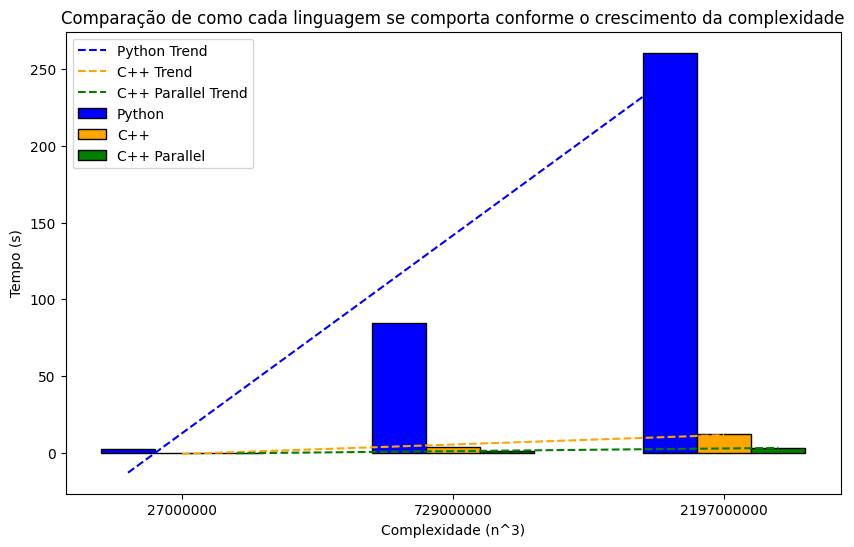

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the x-axis labels
x_labels = df['Complexidade']

# Set the data for each language
python_complexity = df['Python']
cpp_complexity = df['C++']
cpp_parallel_complexity = df['C++ Paralell']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(x_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the bars
plt.bar(r1, python_complexity, color='blue', width=bar_width, edgecolor='black', label='Python')
plt.bar(r2, cpp_complexity, color='orange', width=bar_width, edgecolor='black', label='C++')
plt.bar(r3, cpp_parallel_complexity, color='green', width=bar_width, edgecolor='black', label='C++ Parallel')

# Function to plot trend lines
def plot_trend_line(x, y, color, label):
    z = np.polyfit(x, y, 1)  # Linear fit
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--', color=color, label=label + ' Trend')

# Trend lines for each dataset
plot_trend_line(r1, python_complexity, 'blue', 'Python')
plot_trend_line(r2, cpp_complexity, 'orange', 'C++')
plot_trend_line(r3, cpp_parallel_complexity, 'green', 'C++ Parallel')

# Add labels and title
plt.xlabel('Complexidade (n^3)')
plt.ylabel('Tempo (s)')
plt.title('Comparação de como cada linguagem se comporta conforme o crescimento da complexidade')

# Adjust x-axis tick labels
plt.xticks([r + bar_width for r in range(len(x_labels))], x_labels)

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the x-axis labels
x_labels = df['Complexidade']

# Set the data for each language
python_complexity = df['Python']
cpp_complexity = df['C++']
cpp_parallel_complexity = df['C++ Paralell']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(x_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the bars
plt.bar(r1, python_complexity, color='blue', width=bar_width, edgecolor='black', label='Python')
plt.bar(r2, cpp_complexity, color='orange', width=bar_width, edgecolor='black', label='C++')
plt.bar(r3, cpp_parallel_complexity, color='green', width=bar_width, edgecolor='black', label='C++ Parallel')

# Function to plot trend lines
def plot_trend_line(x, y, color, label):
    z = np.polyfit(x, y, 1)  # Linear fit
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle='--', color=color, label=label + ' Trend')

# Trend lines for each dataset
plot_trend_line(r1, python_complexity, 'blue', 'Python')
plot_trend_line(r2, cpp_complexity, 'orange', 'C++')
plot_trend_line(r3, cpp_parallel_complexity, 'green', 'C++ Parallel')

# Add labels and title
plt.xlabel('Complexidade (n^3)')
plt.ylabel('Tempo (s)')
plt.title('Comparação de como cada linguagem se comporta conforme o crescimento da complexidade')

# Adjust x-axis tick labels
plt.xticks([r + bar_width for r in range(len(x_labels))], x_labels)

# Add a legend
plt.legend()

# Show the plot
plt.show()



- Faça uma análise comparativa sobre o impacto do paralelismo no desempenho de acordo com a complexidade do problema:


    O paralelo nesta situação demonstrou uma clara vantagem por poder utilizar o paralelismo via uso de multiplos "processadores" para fazer o calculo de matrizes que é um problema muito paralelizavel vendo um crescimento muito baixo conforme a complexidade do problema aumenta. Já no caso do código em C++ sem paralelismo, o tempo de execução cresce de forma exponencial conforme a complexidade do problema aumenta. E no caso python o problema se mantem o mesmo, pois o python não é uma linguagem compilada, sendo interpretada, o que faz com que o tempo de execução seja muito maior que o C++ e C++ paralelo e vemos que ele não faz um bom uso do processamento pois mesmo assim a linguagem se manteve inefficiente e teve um ganho "baixo" comparado com as linguagens compiladas.

- Comente sobre como você acha que este problema pode ser abordado em um ambiente de HPC:


    Isso poderia ser melhorado com um maior controle da distribuição dos processos para cada "maquina" disponivel assim podendo organizar melhor cada responsabilidade, aumentando assim o desempenho da paralização dos processos.


OBS: Ajustando algo que foi dito no relatório anterior, o tempo do codigo paralelo e do codigo em C++ são muito proximos, isso se deve ao fato de que não foi habilitado o uso de processos em paralelo.